In [62]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
# Read in the csv file
meteorite_landings = pd.read_csv("..//Meteorite_Landings_original_file.csv")

# Make sure the file was read and check for Null/NaN values
meteorite_landings.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [65]:
# Drop entries that are missing values
clean_df = meteorite_landings.dropna()

# Display new DF
clean_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [71]:
# Drop years before 1983
new_clean_df = clean_df.drop(clean_df[(clean_df['year'] <= 1982.0)].index)
new_clean_df.head()


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001.0,13.66033,28.96000,"(13.66033, 28.96)"
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002.0,45.82133,6.01533,"(45.82133, 6.01533)"
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008.0,20.74575,32.41275,"(20.74575, 32.41275)"
42,Aomori,2313,Valid,L6,320.0,Fell,1984.0,40.81056,140.78556,"(40.81056, 140.78556)"
49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009.0,31.80500,-97.01000,"(31.805, -97.01)"


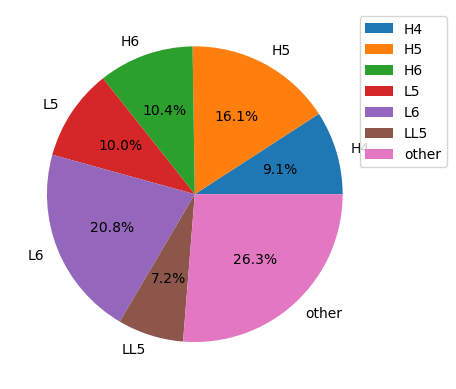

In [73]:
# Pie chart showing makup of different meteorites
totals = new_clean_df.groupby(new_clean_df["recclass"])["recclass"].count()
proportions = totals / totals.sum()

threshold = 0.05
below_thresh_mask = proportions < threshold
plot_data = proportions[~below_thresh_mask]
plot_data.loc['other'] = proportions[below_thresh_mask].sum()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    plot_data, labels=plot_data.index, autopct='%1.1f%%'
)

ax.legend(bbox_to_anchor=(1.2, 1))

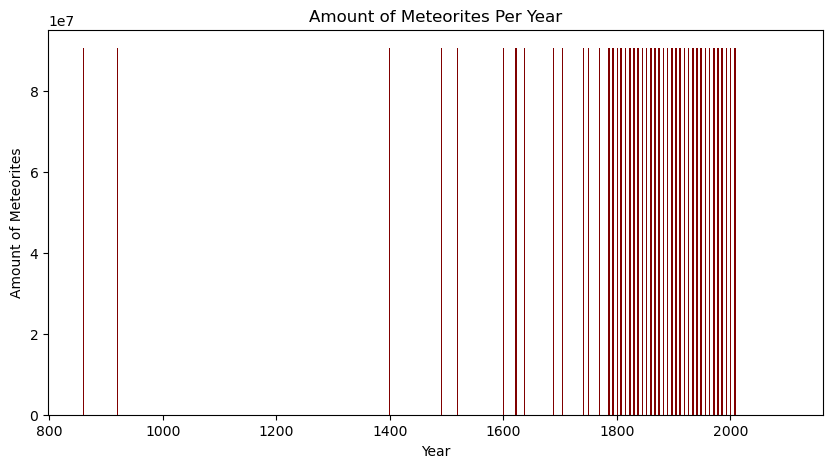

In [89]:
# Plot bar chart
data = meteorite_landings.groupby(meteorite_landings["year"])["year"].count()
year = list(data.keys())
values = meteorite_landings["year"].sum()

fig = plt.figure(figsize = (10,5))


plt.bar(year, values, color='maroon', width=0.4)

plt.xlabel("Year")
plt.ylabel("Amount of Meteorites")
plt.title("Amount of Meteorites Per Year")
plt.show()